図14.3のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#制御対象の分子・分母多項式を与える
num = [0, 1] #分子多項式
den1 = [1, 1] #P_{1}(s)の分母多項式
den2 = [1, 0] #P_{2}(s)の分母多項式

#コントローラの分子・分母多項式を与える．
numc = [10]; #C=10の場合の分子多項式
denc = [1]; #分母多項式

#制御対象とコントローラの伝達関数表現を与える
sys1 = matlab.tf( num, den1 ); #P_1(s)の伝達関数表現
sys2 = matlab.tf( num, den2 ); #P_2(s)の伝達関数表現
c = matlab.tf( numc, denc); #コントローラの伝達関数表現

#開ループ伝達関数を求める
sysL1 = c*sys1; #P_1(s)の場合の開ループ伝達関数
sysL2 = c*sys2; #P_2(s)の場合の開ループ伝達関数

#閉ループ伝達関数を求める
sysC1 = matlab.feedback( sysL1, 1 ); #P_1(s)の場合の閉ループ伝達関数
sysC2 = matlab.feedback( sysL2, 1 ); #P_2(s)の場合の閉ループ伝達関数

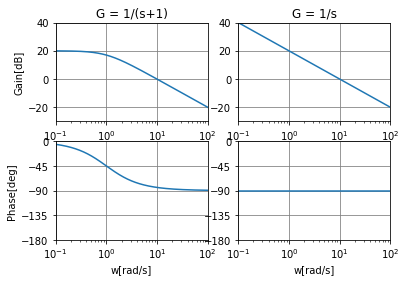

In [3]:
#図14.3

#開ループ伝達関数の処理
[numL11, denL11] = matlab.tfdata(sysL1) #開ループ伝達関数L_1(s)の分子・分母多項式を抜き出す
numL1 = numL11[0][0] #分子多項式におけるPythonの配列の処理
denL1 = denL11[0][0] #分母多項式におけるPythonの配列の処理

[numL22, denL22] = matlab.tfdata(sysL2) #開ループ伝達関数L_2(s)の分子・分母多項式を抜き出す
numL2 = numL22[0][0] #分子多項式におけるPythonの配列の処理
denL2 = denL22[0][0] #分母多項式におけるPythonの配列の処理

#開ループ伝達関数を与える
sysLG1 = signal.lti(numL1, denL1) #L_1(s)の場合の伝達関数表現（signal.ltiの場合）
sysLG2 = signal.lti(numL2, denL2) #L_2(s)の場合の伝達関数表現（signal.ltiの場合）

#角周波数の範囲を指定
w = np.logspace(-1, 2, 1000)#対数的に等間隔なベクトルの生成(10^{-1}から10^{2}で1000点)

#開ループ伝達関数のゲインと位相の計算

#図14.3(a)

#ゲインと位相の計算
wL1, magL1, phaseL1 = signal.bode(sysLG1, w) #ゲインと位相

#図14.3(a)のプロット
plt.subplot(2, 2, 1) #複数の図を並べるためのコマンド．2行2列の1行1列目という意味
plt.semilogx(wL1, magL1) #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-30,40]) #縦軸の範囲の指定
plt.yticks([-20,0,20,40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("G = 1/(s+1)") #タイトルの表示

plt.subplot(2, 2, 3) #複数の図を並べるためのコマンド．2行2列の2行1列目という意味
plt.semilogx(wL1, phaseL1) #位相線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-180,0]) #縦軸の範囲の指定
plt.yticks([-180,-135,-90,-45,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示

#図14.3(b)

#ゲインと位相の計算
wL2, magL2, phaseL2 = signal.bode(sysLG2, w) #ゲインと位相

#図14.3(b)のプロット
plt.subplot(2, 2, 2) #複数の図を並べるためのコマンド．2行2列の1行2列目という意味
plt.semilogx(wL2, magL2) #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-30,40]) #縦軸の範囲の指定
plt.yticks([-20,0,20,40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("G = 1/s") #タイトルの表示

plt.subplot(2, 2, 4) #複数の図を並べるためのコマンド．2行2列の2行2列目という意味
plt.semilogx(wL2, phaseL2) #ゲイン線図をプロット
plt.xlim([0.1,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-180,0]) #縦軸の範囲の指定
plt.yticks([-180,-135,-90,-45,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Phase[deg]") #縦軸のラベル表示

plt.show() #グラフの表示

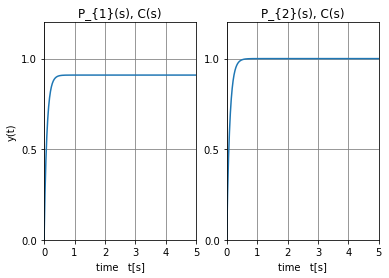

In [4]:
#図14.3(c), (d)の描画

#時間変数の定義
t = arange(0, 10, 0.01) #0から10まで0.01刻み

#各コントローラに対応したステップ応答を求める
y1, t1 = matlab.step(sysC1, t) #ステップ応答
y2, t2 = matlab.step(sysC2, t) #ステップ応答

#図14.3(c)のプロット
plt.subplot(1,2,1) #複数の図を並べるためのコマンド．1行2列の1列目という意味
plt.plot(t1, y1) #ステップ応答をプロット
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([0.0,1.2]) #縦軸の範囲の指定
plt.xticks([0, 1, 2, 3, 4, 5]) #横軸の目盛りの値の設定
plt.yticks([0.0, 0.5, 1.0]) #横軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("P_{1}(s), C(s)") #タイトルの表示

#図14.3(d)のプロット
plt.subplot(1,2,2) #複数の図を並べるためのコマンド．1行2列の2列目という意味
plt.plot(t2, y2) #ステップ応答をプロット
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([0.0, 1.2]) #縦軸の範囲の指定
plt.xticks([0, 1, 2, 3, 4, 5]) #横軸の目盛りの値の設定
plt.yticks([0.0, 0.5, 1.0]) #横軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
#plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("P_{2}(s), C(s)") #タイトルの表示

plt.show() #グラフの表示